## Aprendizaje Supervisado con scikit-learn
Los valores a predeir son conocidos.

Objetivo: predecir los valores objetivo con datos divertidos que se ven, dadas las características.

### Tipos de Apredizaje supervisado

        Clasificacion: La variable objetivo consta de categorías.
        Regresion: La variable objetivo es continua.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [16]:
file = r'C:\Users\rfigu\Documents\Learn\Datacamp\Python\ML\Supervised Learning with scikit-learn\telecom_churn_clean.csv'
churn_df = pd.read_csv(file, delimiter=',', usecols=lambda c: not c.startswith('Unnamed:'))
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
# Sample Code
from sklearn.model_selection import train_test_split

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                                    
random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.872


### k-NearestNeighbors


In [19]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [20]:
knn = KNeighborsClassifier(n_neighbors=15)

Predicting on unlabeled data

In [21]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [22]:
X_new = np.array([[56.8, 17.5],                  
                  [24.4, 24.1],                  
                  [50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [23]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


Complejidad del modelo y ajuste excesivo o insuficiente

In [25]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:    
    knn = KNeighborsClassifier(n_neighbors=neighbor)    
    knn.fit(X_train, y_train)    
    train_accuracies[neighbor] = knn.score(X_train, y_train)    
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 1.0, 2: 0.9061294470638662, 3: 0.9048435490784398, 4: 0.8911273039005573, 5: 0.8906986712387484, 6: 0.8851264466352337, 7: 0.8829832833261895, 8: 0.8825546506643807, 9: 0.8834119159879983, 10: 0.8825546506643807, 11: 0.8812687526789541, 12: 0.8804114873553365, 13: 0.8816973853407629, 14: 0.8799828546935277, 15: 0.8834119159879983, 16: 0.8812687526789541, 17: 0.8808401200171453, 18: 0.8795542220317188, 19: 0.8786969567081011, 20: 0.8808401200171453, 21: 0.8808401200171453, 22: 0.8782683240462923, 23: 0.8821260180025718, 24: 0.8774110587226747, 25: 0.8812687526789541} 
 {1: 0.807, 2: 0.871, 3: 0.855, 4: 0.873, 5: 0.867, 6: 0.872, 7: 0.875, 8: 0.876, 9: 0.88, 10: 0.878, 11: 0.878, 12: 0.877, 13: 0.878, 14: 0.877, 15: 0.879, 16: 0.881, 17: 0.879, 18: 0.876, 19: 0.878, 20: 0.877, 21: 0.876, 22: 0.877, 23: 0.881, 24: 0.879, 25: 0.88}


### Visualizing model complexity

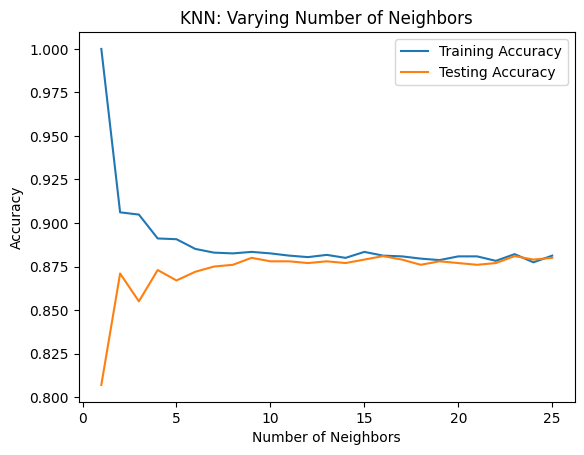

In [28]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()